# Descripción del problema

Los datos provienen de una planta minera.
El objetivo principal de estos datos es poder predecir la impureza en el concentrado de mineral extraído. Esta impureza es medida cada hora. Con las predicciones podríamos ayudar a los ingenieros con una alerta temprana para que puedan tomar acciones correctivas. 


- `% Silica Concentrate` es la concentración de sílice (laboratorio).
- `% Iron Concentrate` es la concentración de hierro (laboratorio).
- El concentrado de sílice es la impureza en el mineral de hierro que debe eliminarse.
- El proceso actual de detección de sílice lleva muchas horas.


Con la ayuda de algunos análisis y modelos de datos, podemos dar una buena aproximación del concentrado de sílice que reducirá mucho tiempo y esfuerzos necesarios para procesar el mineral de hierro


Fuente:
https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process


## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

## Lectura de datos

In [2]:
df = pd.read_csv('data/MiningProcess_Flotation_Plant_Database.csv', decimal=",").drop_duplicates()

In [3]:
df = df.drop(["date","% Iron Concentrate"],axis = 1)

In [4]:
df = df.sample(10000) #usaremos solo 10000 registros para el ejercicio

In [5]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
209378,52.61,20.24,394.694155,354.436608,406.710688,8.93457,1.521012,176.526595,253.604,250.077,...,227.594,290.068,802.961659,744.208429,833.360046,653.955867,516.232246,688.710604,469.359073,5.03
447795,54.10,15.33,1036.283953,343.535327,401.897848,9.62033,1.568701,299.905000,303.556,299.275,...,301.826,301.670,811.471418,815.599596,880.687458,638.666096,673.977393,698.159844,653.611673,1.34
90024,53.04,19.19,2113.830000,439.462000,395.449000,9.95466,1.747770,250.158000,252.467,250.931,...,249.718,253.949,805.697000,801.628000,808.787000,441.505000,432.775000,424.611000,440.417000,2.29
553658,57.46,10.80,3523.440000,564.352000,402.171000,10.08850,1.715510,251.374000,311.670,304.039,...,293.685,303.882,468.632000,487.676000,415.333000,370.361000,370.767000,341.160000,372.881000,5.20
664425,65.78,1.31,2654.130000,414.429000,379.829000,9.50385,1.655360,298.899000,295.467,300.401,...,290.364,293.971,502.879000,501.453000,525.181000,514.318000,520.149000,575.894000,495.921000,1.13


In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,56.339809,14.606505,2890.467499,488.970619,397.628733,9.769452,1.681155,280.380995,277.191400,281.185495,...,292.219565,290.766147,518.666135,520.490105,528.821193,420.296066,425.405475,429.147952,421.417011,2.317697
std,5.191750,6.833800,1205.065818,91.086034,9.583492,0.381739,0.068367,29.372626,29.988648,28.318231,...,30.012506,28.520016,129.206273,125.838884,148.609918,91.116564,84.080473,88.706110,84.079010,1.109638
min,42.740000,1.310000,0.083469,242.107722,376.253000,8.753385,1.519844,175.832128,175.947354,176.670284,...,191.937000,189.331769,149.599000,211.705000,127.639100,162.301667,168.577385,162.761500,176.011000,0.600000
25%,52.670000,8.820000,2098.230000,434.032750,394.511750,9.541807,1.648038,250.297750,250.389000,250.861500,...,278.999130,256.597250,415.480250,441.372750,409.909000,357.422000,358.570250,359.431000,356.970000,1.440000
50%,56.080000,13.810000,3060.555000,505.327500,399.263500,9.806510,1.697940,299.335500,296.191000,298.697500,...,299.487000,299.018500,490.286000,495.002500,493.651000,412.269000,408.801500,423.108000,411.611000,2.010000
75%,59.720000,19.600000,3735.417500,553.428750,402.988000,10.033400,1.728330,300.146000,300.707250,300.402250,...,303.125250,301.836250,593.329000,593.016250,600.233500,485.484250,484.805000,491.685250,476.144500,2.990000
max,65.780000,33.400000,6295.340000,739.239181,418.625035,10.807672,1.852797,368.103469,373.675000,307.545000,...,370.552000,371.572000,861.566985,828.635000,886.640921,680.222000,674.510686,698.605547,658.946143,5.530000


## Preparación de datos

In [7]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1) #todas las columnas, menos la objetivo

In [8]:
#escalamos
scaler_X = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler_X.fit_transform(X),columns=X.columns)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [9]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [10]:
def plot(y_train,y_train_hat,y_test,y_test_hat): #usamos una funcion pra llamarla varias veces
    #Definimos los limites de la  grafica
    plt.figure(figsize=(10,10))
    plt.axis([0,1,0,1])
    plt.plot([[0,0],[1,1]], "r--")
    
    #Grafica de dispersión (Real vs predicción)
    plt.scatter(y_train,y_train_hat, label="Entrenamiento",alpha=0.8)
    plt.scatter(y_test,y_test_hat, label="Prueba", alpha=0.8)
    
    #Preparamos las etiquetas
    plt.legend()
    plt.xlabel("Y Real")
    plt.ylabel("Y Predicción")
    
    #Calculamos error cuadrático medio
    error = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)),
                               scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)))
    print("El error cuadrático medio es {}".format(error))

## Regresión Lineal

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train) #Creando el modelo y entrenando
y_train_hat = reg.predict(X_train) #Prediciendo valores de entrenamiento
y_test_hat = reg.predict(X_test) #Prediciendo valores de validación

El error cuadrático medio es 1.070676078476608


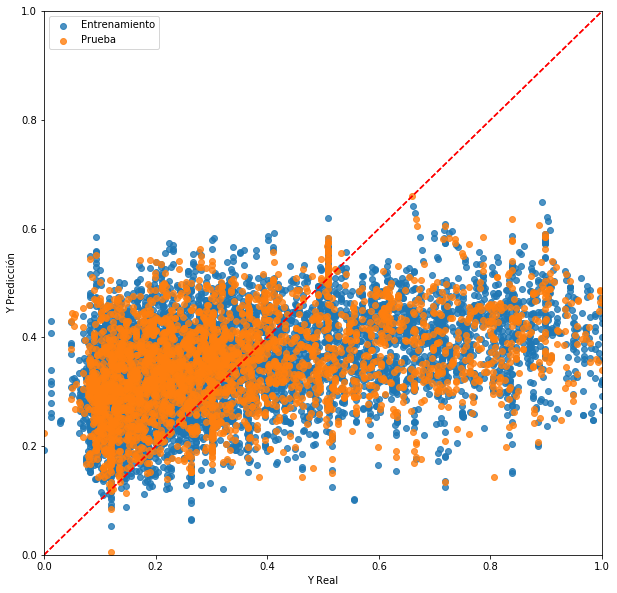

In [12]:
plot(y_train,y_train_hat,y_test,y_test_hat)
#CONCLUSION: con una regresion lineal no predecimos bien, lo ideal es tener todos los valores sobre la linea roja

## SVR

El error cuadrático medio es 1.0339293748933687


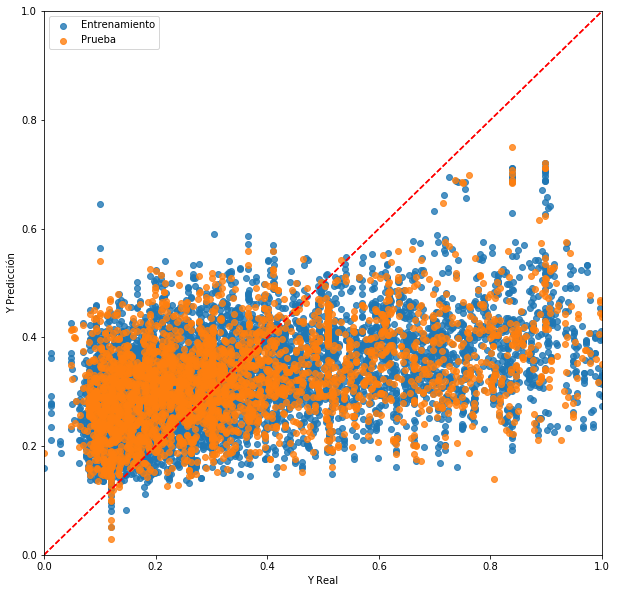

In [13]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train,y_train.ravel())

y_train_hat = svr_rbf.predict(X_train)#Prediciendo valores de entrenamiento
y_test_hat = svr_rbf.predict(X_test)#Prediciendo valores de validación
plot(y_train,y_train_hat,y_test,y_test_hat)

#CONCLUSION: hemos mejorado un poco el error frente a regresion lineal pero sigue muy lejos

El error cuadrático medio es 1.0703634805705495


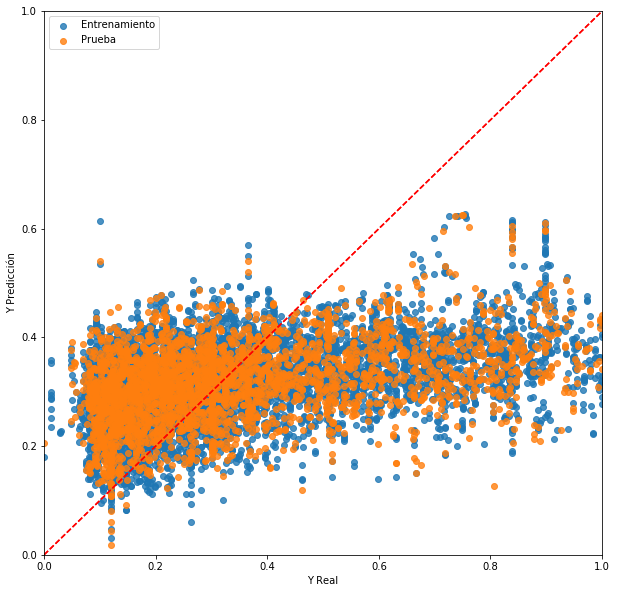

In [14]:
#SVR con otro kernel
svr_poly = SVR(kernel='poly', gamma='auto')
svr_poly.fit(X_train,y_train.ravel())

y_train_hat = svr_poly.predict(X_train)
y_test_hat = svr_poly.predict(X_test)

plot(y_train,y_train_hat,y_test,y_test_hat)

#CONCLUSION: este modelo es aun peor

## Arbol de decisión

El error cuadrático medio es 0.9657337117350691


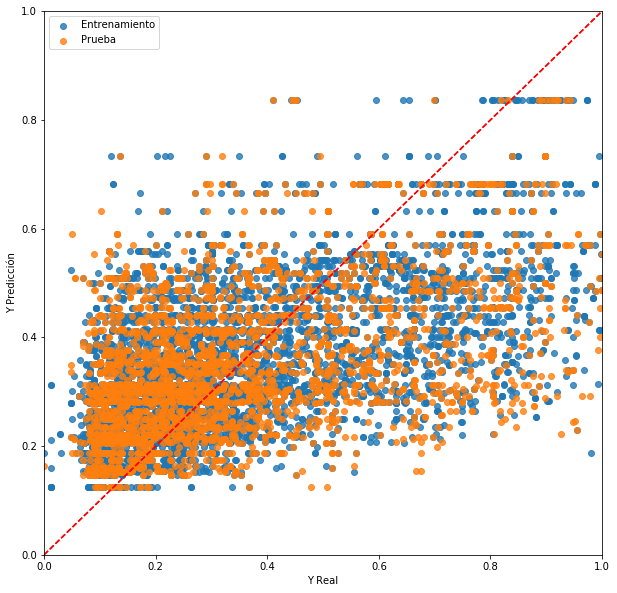

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=12,min_samples_leaf=50)
tree.fit(X_train,y_train.ravel())

y_train_hat = tree.predict(X_train) #Prediciendo valores de entrenamiento
y_test_hat = tree.predict(X_test) #Prediciendo valores de validación

plot(y_train,y_train_hat,y_test,y_test_hat)

#CONCLUSION: este modelo se ajusta mejor pero sigue sin ser bueno, pero es normal seguimos usando las 22 columanas

# Selección de variables

In [16]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, 8, step=1) #reduce las 22 columnas en 8, ve quitando de 1 en 1
selector = selector.fit(X_train, y_train.ravel())

In [17]:
X_train_reduced = X_train.loc[:, selector.support_]
X_test_reduced = X_test.loc[:, selector.support_]
X_train_reduced.head()

,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level
8621,0.409288,0.437812,0.235369,0.647827,0.386100,0.458756,0.462989,0.463756
7631,0.447049,0.422197,0.471261,0.734957,0.385824,0.236112,0.512267,0.534754
1561,0.563802,0.570081,0.954304,0.403138,0.641879,0.364653,0.448716,0.397648
2483,0.924045,0.674997,0.579318,0.559256,0.644713,0.574258,0.440846,0.479084
4349,0.924045,0.520465,0.466057,0.283451,0.650034,0.579467,0.626514,0.629470


El error cuadrático medio es 1.0487832717294083


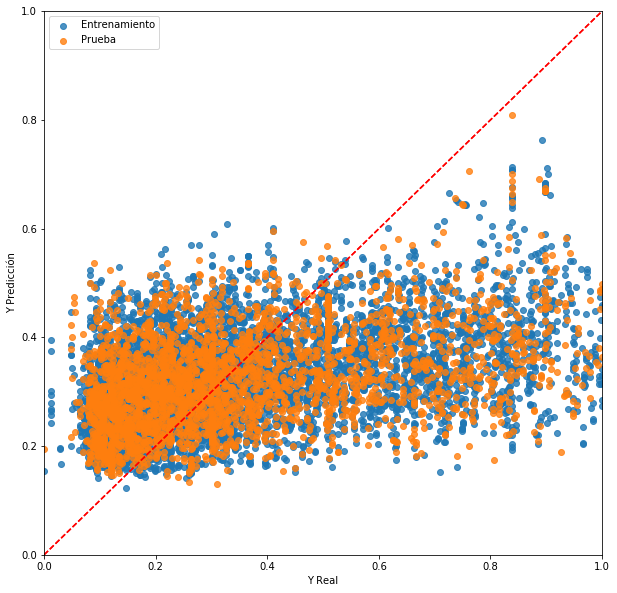

In [18]:
svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train_reduced,y_train.ravel())

y_train_hat = svr_rbf.predict(X_train_reduced) #Prediciendo valores de entrenamiento
y_test_hat = svr_rbf.predict(X_test_reduced) #Prediciendo valores de validación

plot(y_train,y_train_hat,y_test,y_test_hat)
#CONCLUSION: sigue sin ser adecuado, podemos seguir probando modelos uno a uno o irnos a metodos de ensamble para que los pruebe por nosotros

# Métodos de ensamble

Los métodos de ensamble de modelos utilizan múltiples algoritmos de aprendizaje para obtener un mejor rendimiento predictivo que el que se podría obtener de cualquiera de los algoritmos de aprendizaje de manera individual.

El error cuadrático medio es 0.6406041756682285


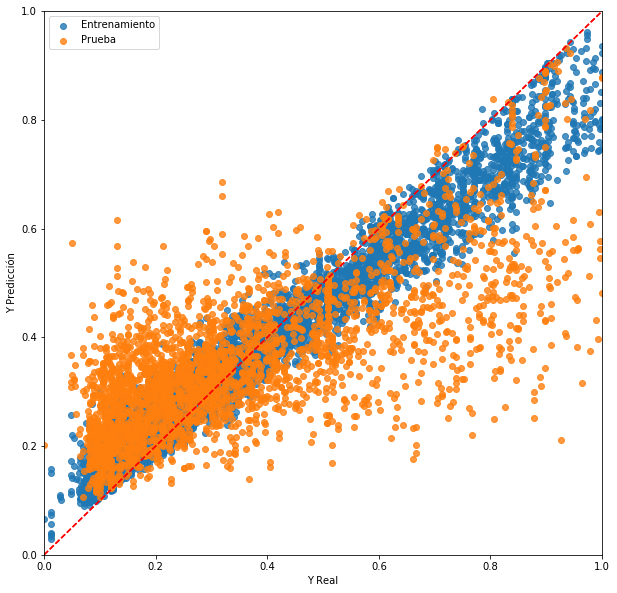

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.ravel())

y_train_hat = rf.predict(X_train) #Prediciendo valores de entrenamiento
y_test_hat = rf.predict(X_test) #Prediciendo valores de validación

plot(y_train,y_train_hat,y_test,y_test_hat)

#CONCLUSION: ahora tenemos un mejor ajuste

El error cuadrático medio es 0.618546994679352


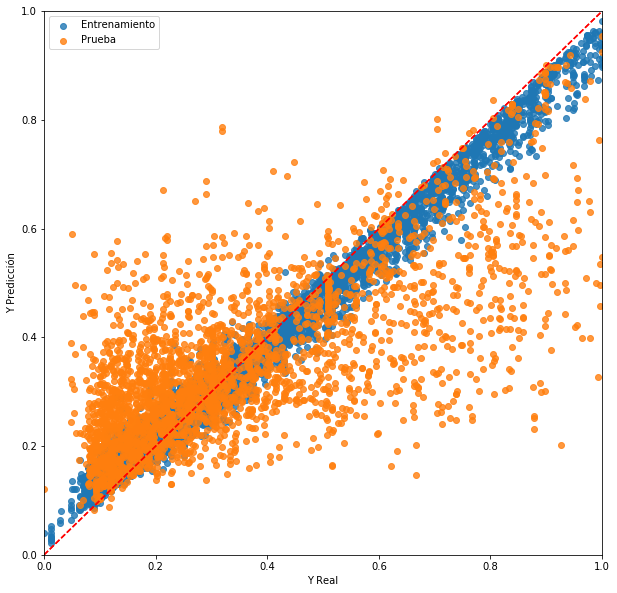

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=40,  max_depth=12, learning_rate=0.1)
gbr.fit(X_train,y_train.ravel())

y_train_hat = gbr.predict(X_train) #Prediciendo valores de entrenamiento
y_test_hat = gbr.predict(X_test) #Prediciendo valores de validación

plot(y_train,y_train_hat,y_test,y_test_hat)